# Compare Prompts

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

# Set folder path
folder_path = "/home/fantoni/patent-sentence-classification/results/prompting"

# Choose model
model_name = 'gpt-3.5-turbo'
#model_name = 'gpt-4o'

results_all = {}
for file_name in os.listdir(folder_path):
    if file_name.endswith(".xlsx") and file_name.startswith(model_name):
        prompt_number = file_name.split('_')[1].replace(".xlsx", "")[-1]
        result_df = pd.read_excel(os.path.join(folder_path, file_name))

        # Set labels
        labels = ['FUN', 'STR', 'MIX', 'OTH']
        true_labels = result_df['true_class']  
        predicted_labels = result_df['pred_class']

        # Calculate classification metrics
        precision = precision_score(true_labels, predicted_labels, average='weighted', zero_division=0)
        recall = recall_score(true_labels, predicted_labels, average='weighted', zero_division=0)
        f1 = f1_score(true_labels, predicted_labels, average='weighted', zero_division=0)

        # Append to results
        results_all[prompt_number] = {'precision': precision, 'recall': recall, 'f1': f1}

results_all

{'3': {'precision': 0.7053890207795679,
  'recall': 0.55,
  'f1': 0.5776322818165045},
 '1': {'precision': 0.7291274889671174,
  'recall': 0.44083333333333335,
  'f1': 0.45993530129724947},
 '5': {'precision': 0.6784058933995208,
  'recall': 0.495,
  'f1': 0.5067430529554451},
 '8': {'precision': 0.6916866868138141,
  'recall': 0.4608333333333333,
  'f1': 0.49638390268496685}}

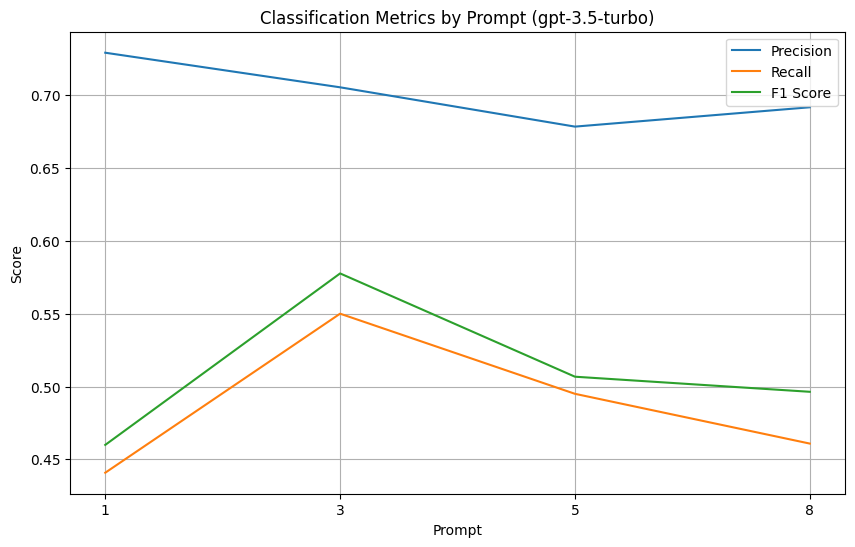

In [2]:
# Sort results by prompt number
sorted_prompts = sorted(results_all.keys())
precision_values = [results_all[p]['precision'] for p in sorted_prompts]
recall_values = [results_all[p]['recall'] for p in sorted_prompts]
f1_values = [results_all[p]['f1'] for p in sorted_prompts]

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(sorted_prompts, precision_values, label='Precision')
plt.plot(sorted_prompts, recall_values, label='Recall')
plt.plot(sorted_prompts, f1_values, label='F1 Score')

plt.xlabel('Prompt')
plt.ylabel('Score')
plt.title(f'Classification Metrics by Prompt ({model_name})')
plt.legend()
plt.grid(True)
plt.show()